<a href="https://colab.research.google.com/github/PatoNaft/first-git-project/blob/master/DirectMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
df = pd.read_csv("DirectMarketing1.csv")
print(df.shape)
df.head()

(1000, 10)


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


*Before we start on the analysis, it is best to make sure there are no missing values.*

In [6]:
df.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

The “History” column contains 303 missing values. These are used to indicate a customer has not made purchase yet. We can check the other values in the column and then decide how to handle the missing values.

In [7]:
df.History.value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

Since it is a categorical column, we can replace the missing values with the word “Nothing” that indicates no purchase has been made yet.

In [9]:
df.History.fillna("Nothing", inplace=True)

df.isna().sum().sum()

0

Amount Spent

We start with checking the statistics of the “AmountSpent” column.

In [11]:
print (f'Average Amount Spent is {df.AmountSpent.mean()}). The median is {df.AmountSpent.median()}')

Average Amount Spent is 1216.77). The median is 962.0


The mean is much higher than the median which shows that this column does not have a normal distribution. There are outliers with high values. Thus, we expect the “AmountSpent” column to have a right skewed distribution.

Let’s check it with a histogram.

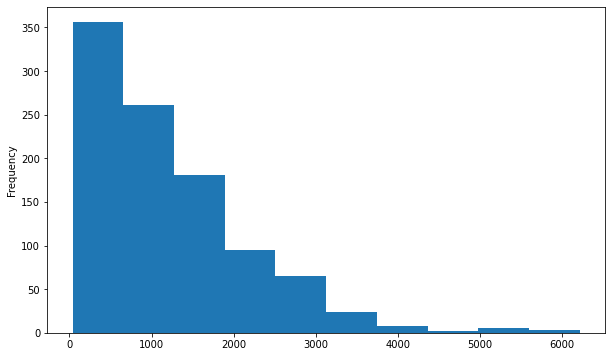

In [12]:
df['AmountSpent'].plot(kind='hist', figsize=(10,6))

It overlaps with the statistics. Most observations are in the low section with a small number of outliers reaching toward the higher end.

**Age**

Age might be an important feature because direct mail marketing tends to appeal older people. The groupby function will give us an overview.

In [13]:
df[['Age', 'AmountSpent']].groupby('Age').mean()

,AmountSpent
Age,
Middle,1501.690945
Old,1432.126829
Young,558.623693


The average amount of money spent is much higher for middle and old aged people than for young people.

I also want to see if the campaign is more focused on older people. We can check the number of catalogs sent to each group along with average money spent.

In [14]:
df[['Age', 'Catalogs', 'AmountSpent']].groupby('Age').agg(['mean', 'count'])

Catalogs        AmountSpent      
             mean count         mean count
Age                                       
Middle  15.425197   508  1501.690945   508
Old     15.160976   205  1432.126829   205
Young   13.024390   287   558.623693   287

The count shows the number of observations in a group. We see that more middle aged people are involved in the campaign. The average number of catalogs sent to young customers are a little less than that of older customers.

As you notice, we can apply multiple aggregations on the group values by passing a list to the aggregate function.

**Correlations between numerical variables**

Before calculating the correlations, I will briefly explain what correlation means with regards to variables.

Correlation is a normalization of covariance by the standard deviation of each variable. Covariance is a quantitative measure that represents how much the variations of two variables match each other. In simpler terms, correlation and covariance indicate if the values tend to change in similar ways.

The normalization of covariance cancels out the units. Thus, the correlation value is always between 0 and 1 in case of positive correlation and 0 and -1 in case of negative correlation.

To calculate the correlations between numerical variables, we will use the corr function of pandas and visualize the results with a heat map.

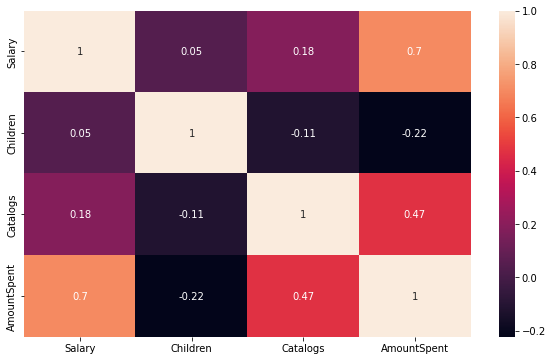

In [15]:
# importing visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True)


There is a highly strong correlation between the salary and spent amount. The number of catalogs also has a positive correlation with spent amount.

On the other hand, number of children and spent amount have a small negative correlation.

**Children**

The correlation matrix shows a negative correlation between the number of children and spent amount. Thus, we expect to see a decreasing spent amount as the number of children increases.

Let’s also check it with the groupby function. I will also include the age column. The groupby function accepts multiple columns and creates a group for each set of categories.

In [16]:
df[['Age', 'Children', 'AmountSpent']]\
.groupby(['Age', 'Children']).agg(['mean', 'count'])

AmountSpent      
                        mean count
Age    Children                   
Middle 0         1787.193939   165
       1         1634.469512   164
       2         1187.173469    98
       3         1031.802469    81
Old    0         1491.139037   187
       1          731.100000    10
       2         1025.166667     6
       3          640.500000     2
Young  0          692.163636   110
       1          540.354839    93
       2          353.690476    42
       3          454.261905    42

In general, the average money spent decreases as the number of children increases. There are a few exceptions though.

**Gender and Marriage**

We will check a couple of measures with the gender and marriage columns. The groupby function allows applying different aggregate functions to different columns. Furthermore, we can rename the columns of aggregations.

It will be more clear with the example. I want to create groups based on gender and marriage columns. Then I will calculate:

    The average number of catalogs sent to each group (mean)
    The total amount of purchases made by each group (sum)

I also want to rename the columns appropriately. Here is the groupby syntax that does this operation:

In [17]:
df[['Gender', 'Married', 'AmountSpent', 'Catalogs']]\
.groupby(['Gender', 'Married'])\
.agg(
    Average_number_of_catalogs = pd.NamedAgg('Catalogs','mean'),
    Total_purchase_amount = pd.NamedAgg('AmountSpent','sum')
)


Average_number_of_catalogs  Total_purchase_amount
Gender Married                                                   
Female Married                   15.546667                 354529
       Single                    12.960854                 164293
Male   Married                   15.617329                 484850
       Single                    14.820276                 213098

The NamedAgg method is used to rename the columns. Another way to change the column names is the rename function of Pandas.

This retailer should definitely focus on married people.

**Location**

The location might also be an important indicator. Let’s check the “AmountSpent” column based on the location.

In [18]:
df[['Location', 'AmountSpent']].groupby('Location')\
.agg(['mean', 'count', 'sum'])

AmountSpent              
                 mean count     sum
Location                           
Close     1061.685915   710  753797
Far       1596.458621   290  462973

The number of customers who live close by is more than double the customers that are far. However, they spend more on average than the customers who live close by.

The retailer might want to focus a little more on people who live far.

**Conclusion**

We can dig more into the dataset and try to gain more insight. We haven’t check some of the features yet. However, the techniques are quite similar.

The main purpose of this post is to introduce different techniques and methods to use in data exploration. 